# Indice

## Tabla de Contenidos
1. [Introducción](#introduccion)
2. [Objetivos](#objetivos)
3. [Datos y Librerías](#datos-y-librerias)
4. [Conociendo los Datos](#conociendo-los-datos)
5. [Análisis Exploratorio de Datos](#analisis-exploratorio-de-datos)
   1. [Formato de la Información](#formato-de-la-informacion)
   2. [Destinos Principales de los Recorridos](#destinos-principales-de-los-recorridos)
   3. [Número de Viajes por Empresa](#numero-de-viajes-por-empresa)
6. [Prueba de Hipótesis](#prueba-de-hipotesis)
7. [Resultado de las Hipótesis](#resultado-de-las-hipotesis)
8. [Conclusión](#conclusion)

<a id="introduccion"></a>
## Introducción

Después de haber recolectado la información esencial mediante SQL, en este proyecto nos enfocaremos en utilizar las capacidades de Python para llevar a cabo el análisis de estos datos. Dado que la mayor parte de la recolección y preparación se realizó previamente en SQL, es probable que este análisis sea más conciso en comparación con los proyectos de sprints pasados.

Nuestro objetivo es validar una hipótesis específica, analizar los datos detenidamente y representarlos gráficamente para facilitar una interpretación más clara y comprensiva de la información obtenida.

<a id="objetivos"></a>
## Objetivos

- Cargar los archivos de datos pertinentes.
- Realizar un examen preliminar de los datos incluidos.
- Confirmar y ajustar, si es necesario, los tipos de datos correspondientes.
- Distinguir los 10 barrios con mayor frecuencia de finalización de trayectos.
- Elaborar representaciones gráficas que muestren:
        a. Las empresas de taxis en relación con el número de trayectos.
        b. Los 10 barrios principales clasificados según la cantidad de finalizaciones de trayectos.
- Derivar conclusiones basándonos en cada representación gráfica y contextualizar los hallazgos.
- Comprobar hipótesis: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

<a id="datos-y-librerias"></a>
## Datos y librerías

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import levene

In [5]:
try:
    df_1 = pd.read_csv('C:/Users/Alejandro/Downloads/project_sql_result_01.csv')
except:
    df_1 = pd.read_csv('/datasets/project_sql_result_01.csv')
    
try:
    df_4 = pd.read_csv('C:/Users/Alejandro/Downloads/project_sql_result_04.csv')
except:
    df_4 = pd.read_csv('/datasets/project_sql_result_04.csv')
    
try:
    df_7 = pd.read_csv('C:/Users/Alejandro/Downloads/project_sql_result_07.csv')
except:
    df_7 = pd.read_csv('/datasets/project_sql_result_07.csv')

<a id="conociendo-los-datos"></a>
## Conociendo los datos

**Nos hemos topado con un inconveniente en nuestro último conjunto de datos. En la sección subsiguiente, ajustaremos el tipo de dato de la columna 'start_ts'. Aunque en este momento es de tipo 'object', es esencial convertirlo a 'datetime' para un análisis adecuado.**

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df_1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [6]:
df_1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [7]:
print("Duplicados en df_1:", df_1.duplicated().sum())

Duplicados en df_1: 0


In [5]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
df_4.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
df_4.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [9]:
print("Duplicados en df_4:", df_4.duplicated().sum())

Duplicados en df_4: 0


In [7]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [8]:
df_7.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [10]:
df_7.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [11]:
print("Duplicados en df_7:", df_7.duplicated().sum())

Duplicados en df_7: 197


In [12]:
df_7 = df_7.drop_duplicates()

In [13]:
zero_duration = df_7[df_7['duration_seconds'] == 0]
print(zero_duration)

                 start_ts weather_conditions  duration_seconds
163   2017-11-11 09:00:00               Good               0.0
168   2017-11-11 07:00:00               Good               0.0
204   2017-11-18 19:00:00               Good               0.0
552   2017-11-04 01:00:00               Good               0.0
801   2017-11-04 09:00:00               Good               0.0
1063  2017-11-25 11:00:00               Good               0.0


In [14]:
print("Duplicados en df_7:", df_7.duplicated().sum())

Duplicados en df_7: 0


In [15]:
df_7 = df_7[df_7['duration_seconds'] != 0]

**En nuestro conjunto de datos más reciente, identificamos una inconsistencia. En la próxima sección, nos ocuparemos de modificar el tipo de dato de la columna 'start_ts'. Actualmente está categorizado como 'object', pero para facilitar nuestra análisis, es imperativo convertirlo a 'datetime'.**

**Además, verificamos algunos valores ausentes en nuestro dataset df_7 en conjuntos con unos viajes con duración de 0 segundos los cuales podrían afectar nuestro análisis, por lo que se ha decidido eliminarlos.**

<a id="analisis-exploratorio-de-datos"></a>
## Análisis exploratorio de datos.

<a id="formato-de-la-informacion"></a>
### Formato de la información

**Antes de sumergirnos en el análisis detallado, es esencial abordar y solucionar un asunto relacionado con el formato de nuestra información. Procederemos a convertir los datos que están en formato str a datetime.**

In [16]:
df_7['start_ts'] = pd.to_datetime(df_7['start_ts'], format='%Y-%m-%d %H:%M:%S')

# Verifiquemos que ha funcionado
df_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            865 non-null    datetime64[ns]
 1   weather_conditions  865 non-null    object        
 2   duration_seconds    865 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.0+ KB


<a id="destinos-principales-de-los-recorridos"></a>
### Destinos principales de los recorridos

**Pasemos a identificar los 10 destinos más frecuentados. Los presentaremos en orden decreciente y elaboraremos un gráfico para visualizar y comprender mejor esta información.**

In [17]:
df_4.sort_values('average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


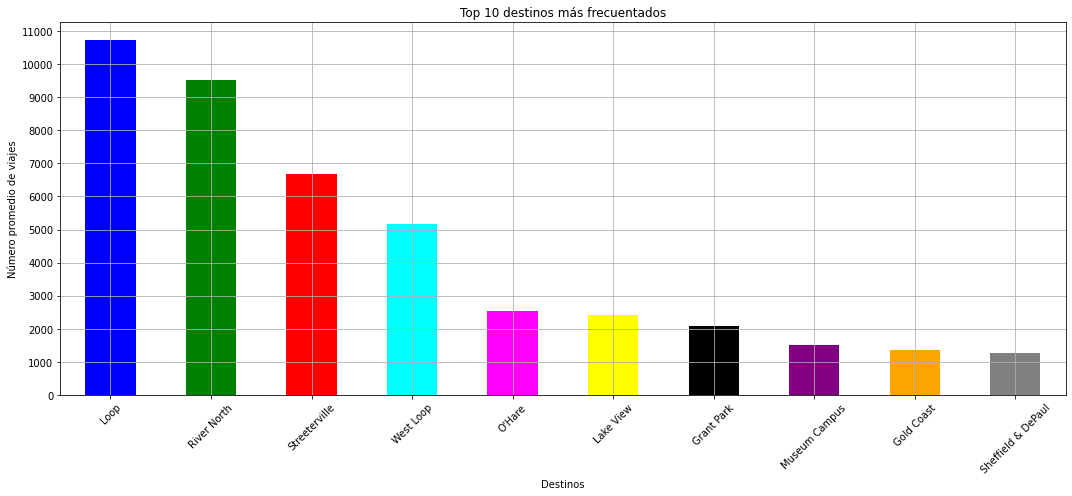

In [20]:
top_destinations = df_4.sort_values('average_trips', ascending=False).loc[0:9,:]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'gray']
ax = top_destinations.plot(kind='bar', x='dropoff_location_name', y='average_trips', 
                           figsize=(15,7), grid=True, color=colors, legend=False)
plt.title('Top 10 destinos más frecuentados')
plt.xlabel('Destinos')
plt.ylabel('Número promedio de viajes')
plt.xticks(rotation=45)
plt.yticks(range(0,11001,1000))
plt.tight_layout()
plt.show()

**Los cuatro primeros destinos dominan claramente en términos de popularidad. De ellos, Loop y River North destacan como los más preferidos por los usuarios. Observando más allá de estos principales destinos, notamos que más de 80 de ellos registran un promedio de menos de 1000 viajes.**

<a id="numero-de-viajes-por-empresa"></a>
### Número de viajes por empresa

In [12]:
df_1.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


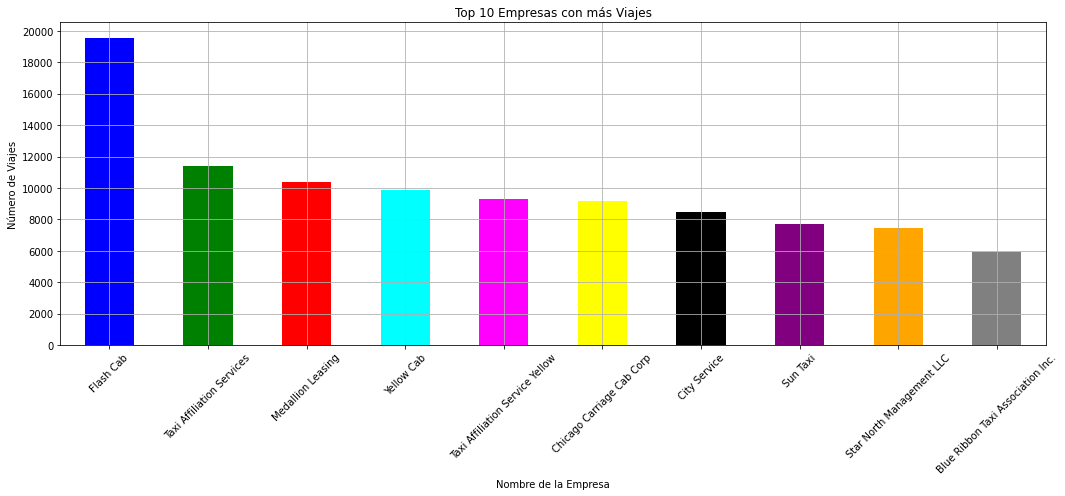

In [28]:
top_companies = df_1.loc[0:9]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'gray']
ax = top_companies.plot(kind='bar', x='company_name', y='trips_amount', 
                        figsize=(15,7), grid=True, color=colors, legend=False)
plt.title('Top 10 Empresas con más Viajes')
plt.xlabel('Nombre de la Empresa')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45)
plt.yticks(range(0,20001,2000))
plt.tight_layout()
plt.show()

**Flash Cab, con aproximadamente 20 mil trayectos, domina claramente el mercado. Esta cifra es prácticamente el doble en comparación con su competidor más cercano, Taxi Affiliation Services. Las demás empresas en el sector muestran una competencia más equilibrada, registrando entre 11 mil y 6 mil viajes cada una.**

<a id="prueba-de-hipotesis"></a>
## Prueba de hipótesis

En esta sección probaremos la siguiente hipótesis:

**"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".**

Es importante recordar que muchos factores pueden influir en la duración de un viaje, y en este momento solo estamos evaluando uno de ellos. Por ello, permitiremos un margen de error del 10% en nuestra prueba. Las múltiples variables que pueden influir en la duración de un trayecto introducirían variabilidad en nuestros resultados, lo que podría sesgar nuestras conclusiones. Al establecer un margen de error del 10%, buscamos mitigar el impacto de esta variabilidad no controlada.

Estableceremos la hipótesis nula como el supuesto básico de que no hay cambio. Es decir, bajo la hipótesis nula, la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare permanece constante, independientemente de si es un sábado lluvioso o no. Esto implicaría que, ya sea con condiciones climáticas favorables o adversas, el tiempo promedio de viaje debería ser similar.

Para validar o refutar esta hipótesis, calcularemos la duración promedio de todos los trayectos, segmentaremos nuestro conjunto de datos en función de las condiciones climáticas y, finalmente, compararemos las duraciones promedio de cada segmento.

In [40]:
# Primero obtengamos la media general
df_7['duration_seconds'].mean()

2110.849710982659

In [41]:
# Ahora veamos la media para cada clima
pd.pivot_table(df_7, values='duration_seconds', index='weather_conditions', aggfunc='mean')

,duration_seconds
weather_conditions,
Bad,2409.229730
Good,2049.259414


In [44]:
# Dividimos el DataFrame según el clima
good_weather = df_7[df_7['weather_conditions']=='Good']
bad_weather = df_7[df_7['weather_conditions']=='Bad']

In [49]:
# Fijamos alpha
alpha = 0.1

# Verificamos si las varianzas son iguales
stat, p = levene(good_weather['duration_seconds'], bad_weather['duration_seconds'])

if p < alpha:
    equal_var = False
    print('Las varianzas no son iguales.')
else:
    equal_var = True
    print('Las varianzas son iguales.')

# Ahora realizamos la prueba t de Student para dos muestras independientes
result = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'], equal_var=equal_var)

print('p-value:', result.pvalue)
if result.pvalue < alpha:
    print('Rechazamos la hipótesis nula.')
else:
    print('No rechazamos la hipótesis nula.')

Las varianzas son iguales.
p-value: 1.5394237752380357e-07
Rechazamos la hipótesis nula.


<a id="resultado-de-las-hipotesis"></a>
## Resultado de las hipótesis

Basado en nuestra prueba estadística, existe una diferencia significativa en la duración de los trayectos entre días con buen clima y días con mal clima. Aunque hemos identificado una correlación entre las condiciones climáticas adversas y un aumento en la duración del trayecto, es importante recordar que correlación no implica causalidad. Si bien los resultados indican que los viajes tienden a ser más prolongados en días de mal clima, otros factores no considerados en este análisis podrían también influir en estas observaciones.

<a id="conclusion"></a>
## Conclusión

Los análisis presentados han revelado varios insights sobre el servicio de taxis. Algunos destinos, como Loop y River North, muestran una mayor popularidad entre los pasajeros. Flash Cab se destaca como líder del mercado, con una presencia significativamente mayor en comparación con otras compañías de taxis. La limpieza y transformación de datos es esencial para obtener resultados precisos y confiables, como se observó al convertir las cadenas de texto a datos de tipo 'datetime'. Además, hemos identificado una correlación entre las condiciones climáticas y la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Sin embargo, es esencial considerar la posibilidad de que otros factores, como el tráfico, eventos locales o incluso problemas de infraestructura, puedan también impactar en la duración de los trayectos. Estos factores podrían ser explorados en análisis futuros para obtener una comprensión más completa de las dinámicas que afectan la duración de los viajes.

Estos cambios refuerzan la idea de que mientras hemos encontrado una correlación, hay consideraciones adicionales que deben tenerse en cuenta antes de establecer conclusiones definitivas sobre causalidad.